# Exploratory Data Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
cwd = os.getcwd()
path_to_challenge1 = os.path.dirname(os.path.dirname(cwd))
path_to_all_data = os.path.join(path_to_challenge1, 'data', 'dataset_500.csv')
path_to_test_data = os.path.join(path_to_challenge1, 'data', 'test_dataset_500.csv')
path_to_train_data = os.path.join(path_to_challenge1, 'data', 'training_dataset_500.csv')

In [3]:
# All Data
df = pd.read_csv(path_to_all_data)
df_test = pd.read_csv(path_to_test_data)
df_train = pd.read_csv(path_to_train_data)

In [4]:
df.head()

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction
0,0,0,1,2011,7,26.2,178.9,740
1,1,1,1,2011,8,25.8,169.7,731
2,2,2,1,2011,9,22.8,170.2,694
3,3,3,1,2011,10,16.4,169.1,688
4,4,4,1,2011,11,11.4,169.1,650


In [5]:
df_test.head()

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction
0,23,23,1,2013,6,22.0,125.5,778
1,47,23,2,2013,6,21.1,123.1,627
2,71,23,3,2013,6,21.9,126.8,735
3,95,23,4,2013,6,20.2,125.2,533
4,119,23,5,2013,6,20.2,125.2,533


In [6]:
len(df_test)

500

# Profiles 

In [7]:
profile = df.profile_report(title='Pandas Profiling Full Data Report')
profile.to_file(output_file="data_profile_full.html")

In [8]:
test_profile = df_test.profile_report(title='Pandas Profiling Test Data Report')
test_profile.to_file(output_file="data_profile_test.html")

In [9]:
train_profile = df_train.profile_report(title='Pandas Profiling Train Data Report')
train_profile.to_file(output_file="data_profile_training.html")

# Manual Exploration

In [10]:
df['DateTime'] = pd.to_datetime(df.Year.map(str) + df.Month.map(str), format="%Y%m")
df.set_index('DateTime', inplace=True)

In [11]:
df.head()

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction
DateTime,,,,,,,,
2011-07-01,0,0,1,2011,7,26.2,178.9,740
2011-08-01,1,1,1,2011,8,25.8,169.7,731
2011-09-01,2,2,1,2011,9,22.8,170.2,694
2011-10-01,3,3,1,2011,10,16.4,169.1,688
2011-11-01,4,4,1,2011,11,11.4,169.1,650


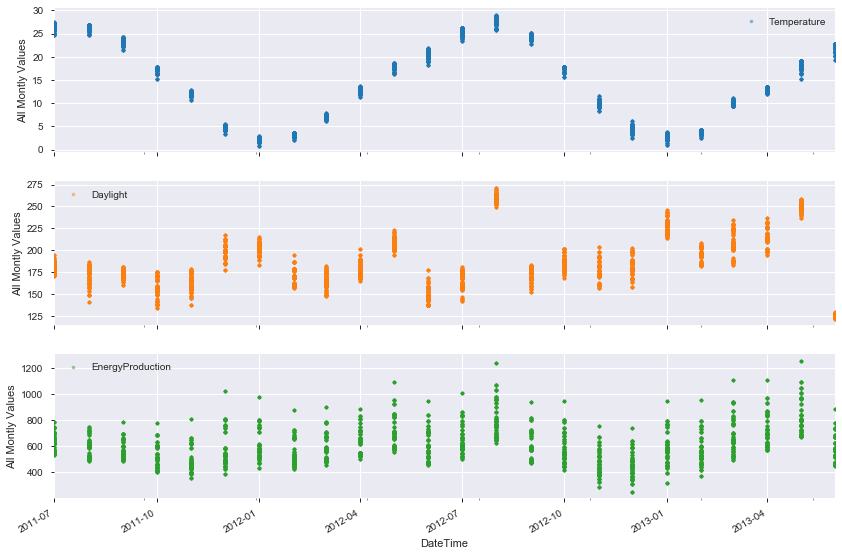

In [12]:
# Visualise All values of Timeseries data
cols_plot = ['Temperature', 'Daylight', 'EnergyProduction']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 10), subplots=True)
for ax in axes:
    ax.set_ylabel('All Montly Values')

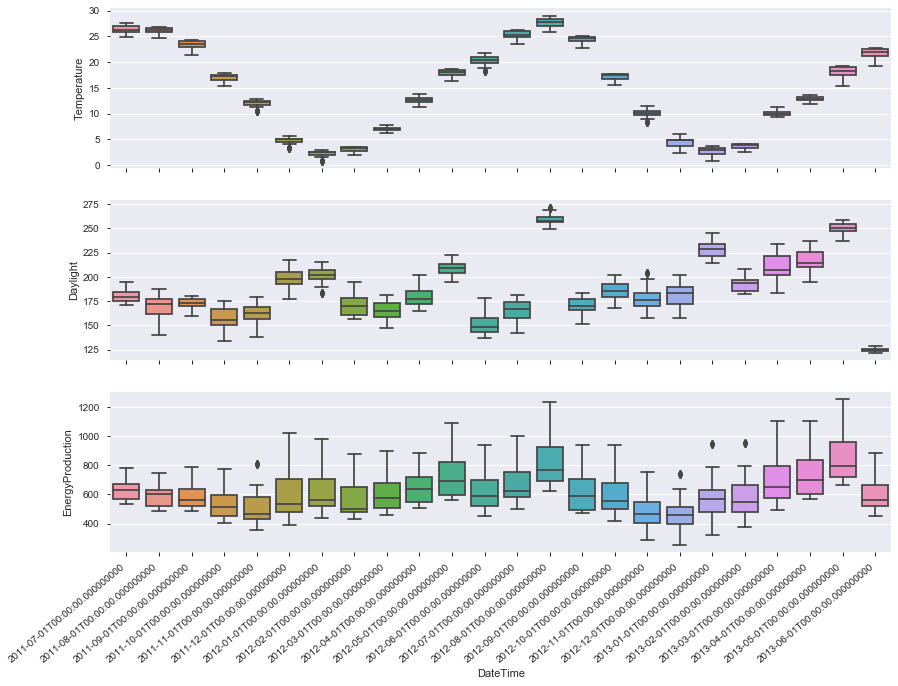

In [13]:
# Distribution of Time Series
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
for name, ax in zip(cols_plot, axes):
    sns.boxplot(data=df, x=df.index, y=name, ax=ax)
    ax.set_ylabel(name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

## House with Higest and Lowest Values

This plots aim to help visualise how different are houses with large vs low Energy Production

In [14]:
group_houses = df.groupby(['House'])[cols_plot].agg(['min', 'max', 'mean', 'std'])

In [15]:
# Sort DataFrame by "Mean EnergyProduction"
group_houses.sort_values([('EnergyProduction', 'mean')], ascending=False)

Temperature                            Daylight                     \
              min   max       mean       std      min    max        mean   
House                                                                      
443           2.7  29.0  15.229167  8.862254    129.1  257.5  193.158333   
395           2.7  29.0  15.229167  8.862254    129.1  257.5  193.158333   
365           2.7  29.0  15.229167  8.862254    129.1  257.5  193.158333   
160           2.7  29.0  15.229167  8.862254    129.1  257.5  193.158333   
109           2.7  29.0  15.229167  8.862254    129.1  257.5  193.158333   
86            2.7  29.0  15.229167  8.862254    129.1  257.5  193.158333   
96            2.7  29.0  15.229167  8.862254    129.1  257.5  193.158333   
277           2.7  29.0  15.229167  8.862254    129.1  257.5  193.158333   
152           2.7  29.0  15.229167  8.862254    129.1  257.5  193.158333   
338           1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
110           1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
447           1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
1             1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
341           1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
81            1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
67            1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
386           1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
281           1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
391           1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
461           1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
15            1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
177           1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
212           1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
190           1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
262           1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
185           1.8  27.4  14.329167  8.744364    125.5  257.1  189.083333   
272           2.5  28.4  15.158333  8.836678    126.0  257.9  195.529167   
348           2.5  28.4  15.158333  8.836678    126.0  257.9  195.529167   
60            2.5  28.4  15.158333  8.836678    126.0  257.9  195.529167   
174           2.5  28.4  15.158333  8.836678    126.0  257.9  195.529167   
...           ...   ...        ...       ...      ...    ...         ...   
344           2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
242           2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
346           2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
138           2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
5             2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
92            2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
4             2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
111           2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
406           2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
203           2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
120           2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
292           2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
436           2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
472           2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
410           2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
464           2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
119           2.7  27.0  14.495833  8.153552    125.2  268.8  180.779167   
263           2.9  26.2  14.212500  7.839937    125.9  271.3  180.591667   
209           2.9  26.2  14.212500  7.839937    125.9 

In [16]:
# Based on the above, lets filter DT
df_filter = df[ df['House'].isin([443,395,287,359]) ]

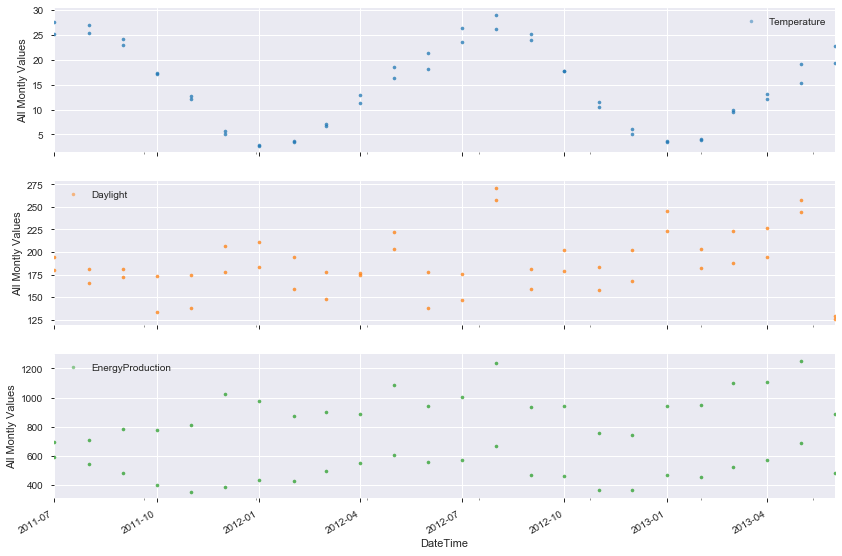

In [17]:
axes = df_filter[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 10), subplots=True)
for ax in axes:
    ax.set_ylabel('All Montly Values')

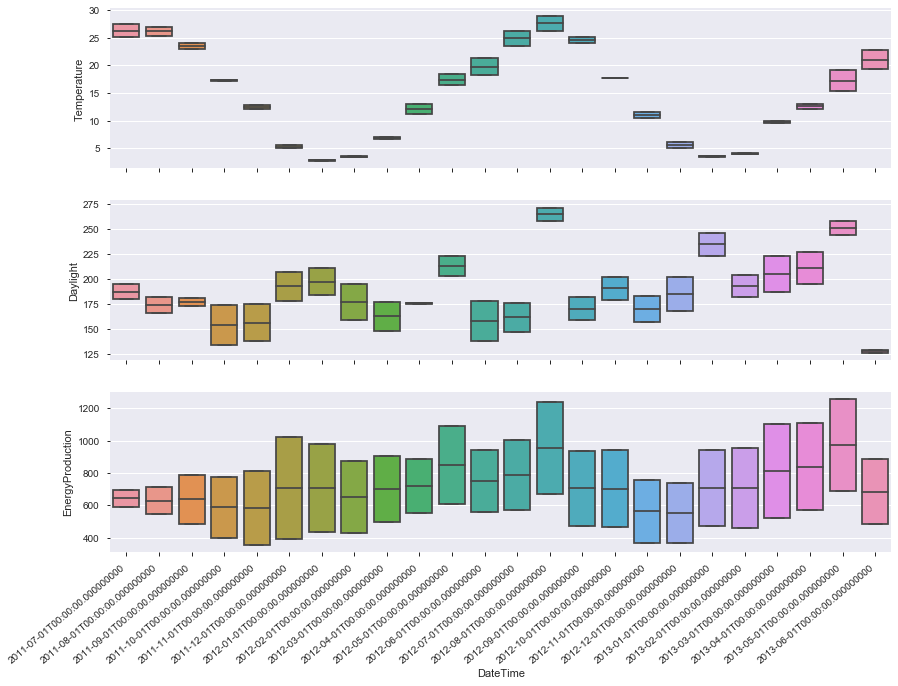

In [18]:
# Distribution of Time Series
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
for name, ax in zip(cols_plot, axes):
    sns.boxplot(data=df_filter, x=df_filter.index, y=name, ax=ax)
    ax.set_ylabel(name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

### This demonstrates that as expected "House" is an Important Feature for any Model, it is also possible to see that there seems to be very high and very low production Houses.

### Good to mention that this looks a great dataset in terms of data quality, no missing values, no obvious outliers, etc.

# Visualising House Types

In [19]:
# Flatening Group House DF
group_houses.columns = [' '.join(col).strip() for col in group_houses.columns.values] 

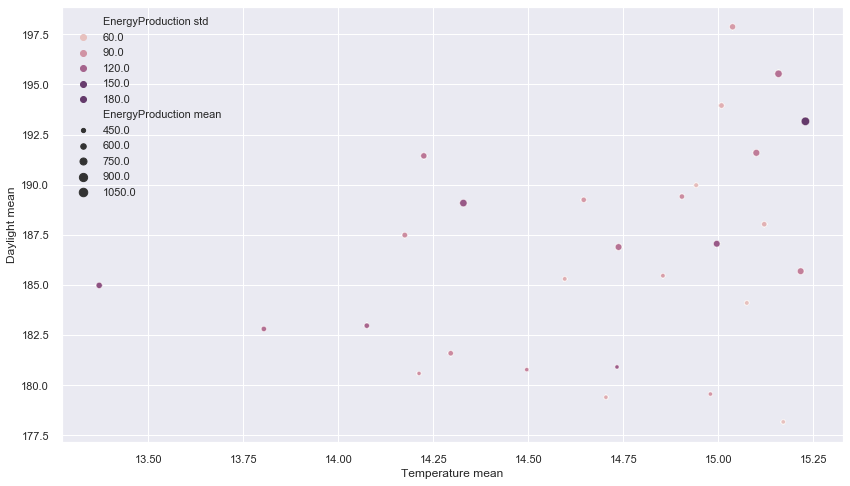

In [20]:
# Plotting Main Variables
sns.set(rc={'figure.figsize':(14,8)})
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="Temperature mean", y="Daylight mean", size="EnergyProduction mean", 
                     palette=cmap, alpha=0.5, hue="EnergyProduction std", 
                     data=group_houses)